### Importa Pandas
###  Leitura do arquivo


In [38]:
import pandas as pd

#publi = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv')
#como o pandas cria uma coluna índice automaticamente a inclusão de index_col=0 faz ele já considerar a coluna 0 como índice
publi = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv',index_col = 0)
publi.head()  # imprime apenas as 5 primeiras linhas
#print(publi) # imprime tudo

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Tipo de arquivo (aceito pelo scikitlearn)

In [39]:
print(type(publi))

<class 'pandas.core.frame.DataFrame'>


### Formato do arquivo

In [40]:
print(publi.shape)

(200, 4)


In [41]:
x = publi[['TV','radio','newspaper']]
y = publi['sales']           

In [42]:
x.shape

(200, 3)

In [43]:
y.shape

(200,)

### Gráficos de dispersão usando o Seaborn

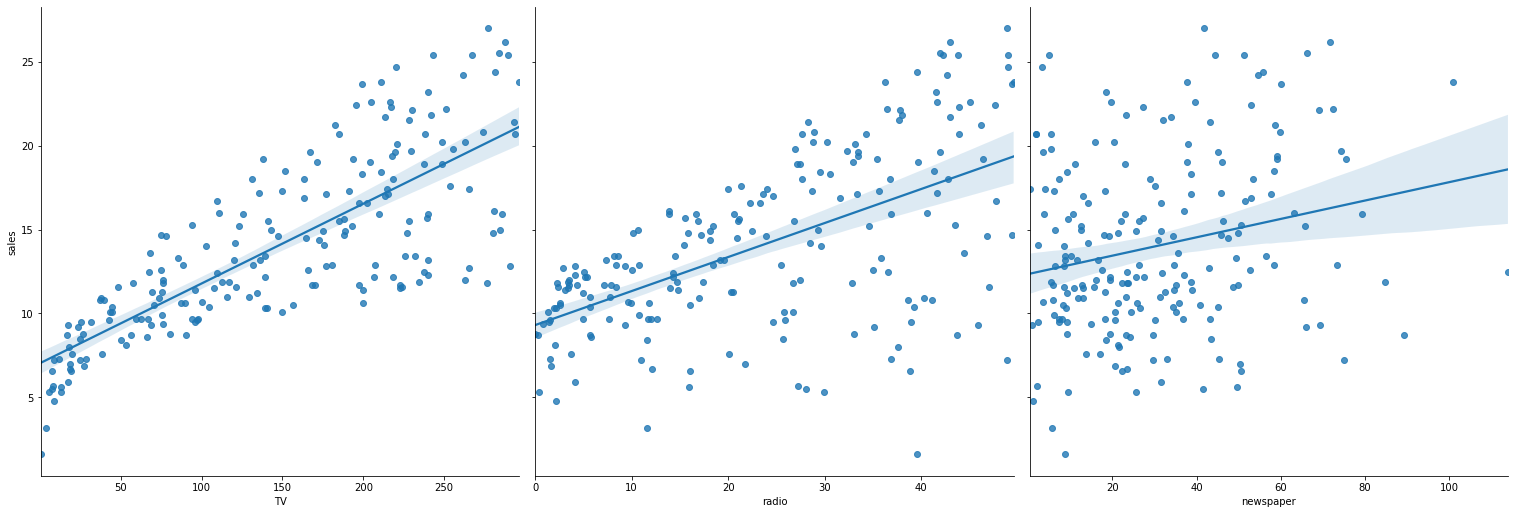

In [44]:
import seaborn as sns
sns.pairplot(publi, x_vars=['TV','radio','newspaper'], y_vars='sales',height=7, kind='reg')

### Calculando o coeficiente de correlação de Pearson e valor-p
(eu que inseri, pois no curso ele não usa o módulo stats)
(variável 'newspaper apresenta um coeficiente de pearson perto de zero e o valor-p bem mais alto que as demais !!!)

In [45]:
from scipy import stats
print("Coeficiente de Pearson entre TV e Sales",round(stats.pearsonr(x['TV'],y)[0],4))
print("Valor-p",stats.pearsonr(x['TV'],y)[1]) #checar esse valor p do pearson
print("Coeficiente de Pearson entre Radio e Sales",round(stats.pearsonr(x['radio'],y)[0],4))
print("Valor-p",stats.pearsonr(x['radio'],y)[1]) #checar esse valor p do pearson
print("Coeficiente de Pearson entre Jornal e Sales",round(stats.pearsonr(x['newspaper'],y)[0],4))
print("Valor-p",stats.pearsonr(x['newspaper'],y)[1]) #checar esse valor p do pearson

Coeficiente de Pearson entre TV e Sales 0.7822
Valor-p 1.4673897001945725e-42
Coeficiente de Pearson entre Radio e Sales 0.5762
Valor-p 4.354966001767037e-19
Coeficiente de Pearson entre Jornal e Sales 0.2283
Valor-p 0.001148195868888248


#### Observação: há evidências estatisticas entre as variáveis "TV", "rádio" e "jornal" com a variável "venda" (valores-p  < 0,05) - https://www.youtube.com/watch?v=TLlzToeIpGc&t=350s

Outra referência interessante: https://neylsoncrepalde.github.io/2018-02-25-regressao-linear-python/

### Separando conjuntos treinamento e teste 

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3) #70% treino e 30% teste

## Importação do modelo de regressão linear

In [47]:
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Coeficientes (de saída) do modelo de regressão linear (múltipla)
Atenção com a variável 'newspaper' (parece que não contribui muito!)

In [48]:
print(reglin.coef_)
list(zip(['TV','radio','newspaper'],reglin.coef_)) # saída melhor

[ 0.04684938  0.20189382 -0.00658202]


[('TV', 0.046849379237505026),
 ('radio', 0.2018938190216701),
 ('newspaper', -0.006582023373602929)]

In [49]:
print('Interpretação dos coeficientes: a cada 1 dolar investido em TV temos um aumento de', round(reglin.coef_[0],4),' na venda (Sale), a cada 1 dolar investido em Rádio temos um aumento de ',round(reglin.coef_[1],4),' na venda (Sale) e a cada 1 dólar investido em Jornais temos um aumento de ',round(reglin.coef_[2],4),' na venda (Sale)')

Interpretação dos coeficientes: a cada 1 dolar investido em TV temos um aumento de 0.0468  na venda (Sale), a cada 1 dolar investido em Rádio temos um aumento de  0.2019  na venda (Sale) e a cada 1 dólar investido em Jornais temos um aumento de  -0.0066  na venda (Sale)


### Teste de predição/previsão para uma entrada (1a. linha de x)
Saída correta é 22.1 (ver Out[1])

In [50]:
print(reglin.predict([[ 230.1,37.8,69.2]]))

[20.50809103]


### Predição/previsão para o conjunto teste

In [51]:
y_prev = reglin.predict(x_test)
print(y_prev)

[10.25245073 17.00820892  8.77967935 15.36949117 12.66214924 13.76721776
 16.42003712 16.71321842  9.17010158  6.69498762 11.57331382 11.64200131
 12.20911004 17.02137293 12.4771703  14.24782584  7.48320215 15.10470269
 18.02482169 18.2653485  15.09054203 21.70337338  8.42316294 21.39299157
 19.31602577 12.21329031 10.31967146 19.91201259  9.59607696 21.13246485
 12.39020977 13.28413782  7.21107822 19.52865824 15.22300616  3.97746473
 10.33833127  7.80610122 15.27885897 19.33564276  9.79083663  8.51809842
  3.07792313 19.33665529 22.04793067 17.0288644   7.65623439  6.14018232
  6.24870413  9.38900419 17.99200175  6.19533221 24.23466494 16.94287053
 14.88564593 12.0640013   8.97980147 18.54518862 10.37443184 12.69992372]


### Saída desejada
(1a. coluna é o índice do dado do conjunto teste e 2a. coluna é a saída desejada (sale))
(tem que comparar na mesma ordem cada elemento da 2a. coluna com o y_prev acima)

In [52]:
print(y_test)

159     7.3
90     16.7
79      5.3
119    15.9
191    10.8
44     12.9
153    16.6
195    17.3
52     10.7
108     8.7
87     12.0
135    10.8
160    12.9
28     15.9
97     11.7
136    11.6
130     9.7
200    13.4
21     18.0
151    16.1
46     14.9
31     21.4
133     5.7
70     22.3
134    19.6
180    12.6
13      9.2
110    19.8
152    11.6
186    22.6
149    10.9
64     14.0
33      9.6
29     18.9
124    15.2
92      7.3
95     11.5
50      9.7
132    12.7
143    20.1
145    11.4
47     10.6
109     5.3
125    19.7
48     23.2
169    17.1
66      9.3
183     8.7
128     8.8
80     11.0
106    19.2
118     9.4
184    26.2
36     12.8
86     15.2
8      13.2
67      9.5
185    17.6
72     12.4
58     13.2
Name: sales, dtype: float64


### Avaliação da Performance do modelo de regressão linear (múltipla)
Diferentemente do KNN e Regressão Logística cuja as variáveis de saída eram categoricas (acerto ou erro do modelo - percentual de acertos), aqui deve-se medir a diferença de cada saída do modelo com a saída desejada.

### MAE (Mean absolute error)

In [53]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_prev))

1.3868866638248487


### MSE (Mean squared error)

In [54]:
print(metrics.mean_squared_error(y_test,y_prev))

2.9055609179245487


### RMSE (Root mean squared error)

In [55]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test,y_prev)))

1.704570596345176
